In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
import random
random.seed(3005)

In [5]:
from scipy.integrate import simps
from numpy import trapz


## Test signals

In [4]:
test = pd.read_csv('synth_series1_w0.3_m5.csv')

In [5]:
test.shape

(500, 3)

<AxesSubplot:>

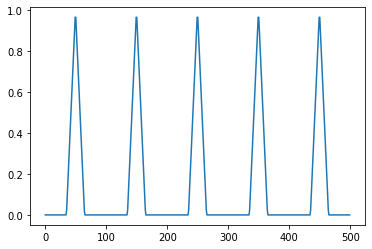

In [6]:
test.y_tri.plot()

<AxesSubplot:>

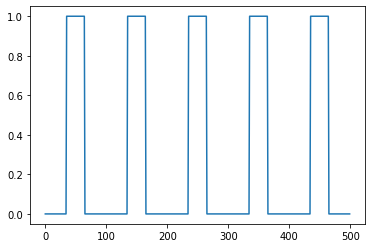

In [7]:
test.y_squ.plot()

<AxesSubplot:>

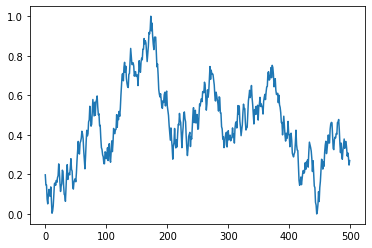

In [8]:
test.y_rnd.plot()

## Create documents

In [9]:
! python sampler_sentences.py

Creating triange wave sample...
Creating square wave sample...
Creating random wave sample...
Creating triange wave sample...
Creating square wave sample...
Creating random wave sample...


### Evaluate samples

In [13]:
sample1 = pd.read_json('synthetic_data/tri_samples_true_text.jsonl', lines = True)
sample2 = pd.read_json('synthetic_data/sq_samples_true_text.jsonl', lines = True)
sample3 = pd.read_json('synthetic_data/rnd_samples_true_text.jsonl', lines = True)

<AxesSubplot:>

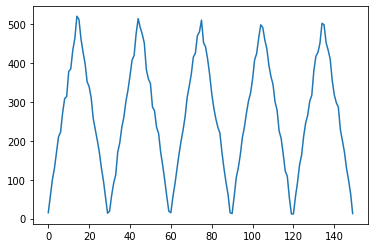

In [14]:
sample1[sample1.noise == False][['id', 'time']].\
    groupby('time').size().reset_index(name='l').l.plot()

<AxesSubplot:>

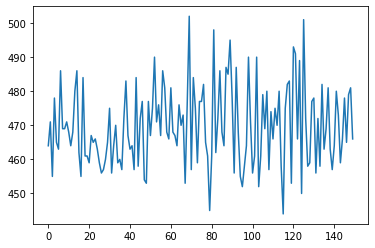

In [21]:
sample2[sample2.noise == False].groupby('time').size().reset_index(name='l').l.plot()

<AxesSubplot:>

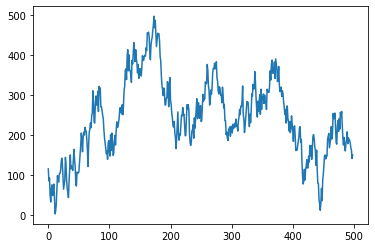

In [20]:
sample3[sample3.noise == False].groupby('time').size().reset_index(name='l').l.plot()

### Evaluate synthetic data

In [1]:
true_labels = {1:'Cluster 1: Kevin rudd', #18
2:'Cluster 2: Climate change', # 24
3:'Cluster 3: Indeginous people', #63
4: 'Noise'}
colour = {'1':'#abd9e9',
'2':'#fdae61',
'3': '#D2AB3C',
'4': '#808080'}

In [2]:
col='coref_text'

In [8]:
docs = pd.read_json('synthetic_data/synthetic_test_data_{}.jsonl'.format(col), 
                    lines = True)

In [9]:
docs[docs.noise == False].groupby(['time']).size().reset_index(name='l').l.max()

1422

In [10]:
docs.shape

(340801, 7)

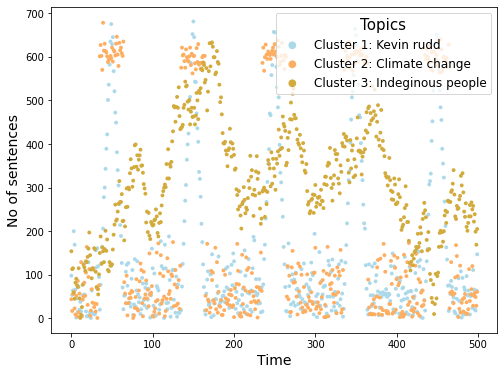

In [11]:
test = docs[['time', 'synthetic_label', 'id']].\
    groupby(['time', 'synthetic_label']).size().reset_index(name='l')

fig, ax = plt.subplots(figsize=(8,6))
for label in test.synthetic_label.unique():
    ax.scatter(test[test.synthetic_label == label].time.tolist(), 
               test[test.synthetic_label == label].l.tolist(), 
               c=[colour[str(i)] for i in test[test.synthetic_label == label].synthetic_label.tolist()], 
               s=15, label=true_labels[label],
               alpha=1, edgecolors='none')

ax.legend(title='Topics', loc=1, prop={'size': 12}, 
          title_fontsize=15, markerscale=2)
ax.set_ylabel("No of sentences", size=14)
ax.set_xlabel("Time", size=14)
ax.grid(False)
plt.show()
fig.savefig('pics/synthetic_clusters_timeseries.png', bbox_inches='tight')